In [223]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [224]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="deepseek-r1-distill-llama-70b")

In [225]:
import operator
from typing import List
from langgraph.graph.message import add_messages
from langchain_core.tools import tool
from pydantic import BaseModel , Field
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt import ToolNode


In [226]:
# def call_model(state:MessagesState):  
#     question = state["messages"][-1]
#     print(f"Question: {question}")
#     response = llm.invoke(question)
#     return {"messages": [response]}

In [227]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

In [228]:
call_model({"messages":"What is the capital of France?"})

{'messages': [AIMessage(content='<think>\n\n</think>\n\nThe capital of France is Paris.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 10, 'total_tokens': 22, 'completion_time': 0.048111315, 'prompt_time': 0.000207776, 'queue_time': 0.203911555, 'total_time': 0.048319091}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--2cc79864-43da-4c77-b08c-f8edfbeadf28-0', usage_metadata={'input_tokens': 10, 'output_tokens': 12, 'total_tokens': 22})]}

In [229]:
workflow=StateGraph(MessagesState)

In [230]:
workflow.add_node("mybot",call_model)

In [231]:
workflow.add_edge(START,"mybot")

In [232]:
workflow.add_edge("mybot",END)

In [233]:
app=workflow.compile()

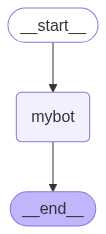

In [234]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [235]:
input={"messages":["hi hello how are you?"]}

In [236]:
app.invoke(input)

{'messages': [HumanMessage(content='hi hello how are you?', additional_kwargs={}, response_metadata={}, id='6f05fc6c-7253-4abf-952e-fad2322a0635'),
  AIMessage(content="<think>\n\n</think>\n\nHi! Hello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you. How are *you* doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.194888214, 'prompt_time': 0.000229575, 'queue_time': 0.203615824, 'total_time': 0.195117789}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--93a3ab9c-5462-4827-87e0-1c29c5bef08d-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}

In [237]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from mybot Node
_______
{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.195577711, 'prompt_time': 0.000479231, 'queue_time': 0.203271922, 'total_time': 0.196056942}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--58af8ff1-d899-4ee7-8361-3cd27fdfefdb-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}




In [238]:
@tool
def search(query: str):
    """
    Search for a query and return the results.
    """
    if "delhi" in query.lower():
        return "the temperature in delhi is 45 degrees celsius"
    return "the temperature is 25 degrees celsius."

In [239]:
search.invoke("What is the temperature in mumbai?")

'the temperature is 25 degrees celsius.'

In [240]:
search.invoke("What is the temperature in delhi?")

'the temperature in delhi is 45 degrees celsius'

In [241]:
search

StructuredTool(name='search', description='Search for a query and return the results.', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x00000261BAA9D760>)

In [242]:
llm.invoke("what is a weather in delhi?")

AIMessage(content='<think>\n\n</think>\n\nAs of my last update in July 2024, I cannot provide real-time weather information. However, Delhi generally experiences a hot and humid climate during the summer months (April to June), with temperatures often reaching 40°C or higher. The monsoon season typically arrives in July, bringing heavy rainfall and relief from the heat. Winters in Delhi (December to February) are cool, with temperatures sometimes dropping to around 5°C. For the most accurate and up-to-date weather information, I recommend checking a reliable weather service or app.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 114, 'prompt_tokens': 11, 'total_tokens': 125, 'completion_time': 0.427676699, 'prompt_time': 0.000335944, 'queue_time': 0.203690304, 'total_time': 0.428012643}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--259d151e-1909-454c-997a-8ba30e

In [243]:
# tools will have list of all tools that can be used in the workflow
tools = [search]

In [244]:
# Bind the tools to the LLM
llm_with_tool=llm.bind_tools(tools)

In [245]:
response = llm_with_tool.invoke("What is the temperature in delhi?")

In [246]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '27921hv3w', 'function': {'arguments': '{"query":"temperature in Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 210, 'prompt_tokens': 132, 'total_tokens': 342, 'completion_time': 0.920004731, 'prompt_time': 0.008501763, 'queue_time': 0.203632788, 'total_time': 0.928506494}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--78954dab-2432-47ac-a98a-38c47fc7a016-0', tool_calls=[{'name': 'search', 'args': {'query': 'temperature in Delhi'}, 'id': '27921hv3w', 'type': 'tool_call'}], usage_metadata={'input_tokens': 132, 'output_tokens': 210, 'total_tokens': 342})

In [247]:
response.content

''

In [248]:
response.tool_calls

[{'name': 'search',
  'args': {'query': 'temperature in Delhi'},
  'id': '27921hv3w',
  'type': 'tool_call'}]

In [249]:
def call_model(state:MessagesState):
    question=state["messages"]
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}

In [250]:
input={"messages":["what is a weather in delhi?"]}


In [251]:
response=call_model(input)


In [252]:
response["messages"][-1].content


''

In [253]:
response["messages"][-1].tool_calls


[{'name': 'search',
  'args': {'query': 'weather in Delhi'},
  'id': 'w7esqg7fg',
  'type': 'tool_call'}]

In [254]:
def router_function(state:MessagesState):
    message=state["messages"]
    last_message=message[-1]
    if last_message.tool_calls:
        return "tools"
    return END

In [255]:
tools


[StructuredTool(name='search', description='Search for a query and return the results.', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x00000261BAA9D760>)]

In [256]:
tool_node=ToolNode(tools)


In [257]:
tool_node

tools(tags=None, recurse=True, explode_args=False, func_accepts_config=True, func_accepts={'store': ('__pregel_store', None)}, tools_by_name={'search': StructuredTool(name='search', description='Search for a query and return the results.', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x00000261BAA9D760>)}, tool_to_state_args={'search': {}}, tool_to_store_arg={'search': None}, handle_tool_errors=True, messages_key='messages')

In [275]:
workflow2=StateGraph(MessagesState)

In [276]:
workflow2.add_node("llmwithtool",call_model)

workflow2.add_node("mytools",tool_node)

In [277]:
workflow2.add_edge(START,"llmwithtool")

workflow2.add_conditional_edges("llmwithtool",
                                router_function,
                                {"tools":"mytools",
                                 END:END})

In [261]:
app2=workflow2.compile()

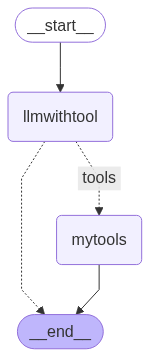

In [262]:
from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [263]:
app2.invoke({"messages":["what is a weather in bengraluru?"]})

{'messages': [HumanMessage(content='what is a weather in bengraluru?', additional_kwargs={}, response_metadata={}, id='57c6f951-fca9-4bb0-a2e7-91956e8ab0d6'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'axak02jfk', 'function': {'arguments': '{"query":"weather in Bengaluru"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 70, 'prompt_tokens': 134, 'total_tokens': 204, 'completion_time': 0.303007604, 'prompt_time': 0.008564753, 'queue_time': 0.203387191, 'total_time': 0.311572357}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--4a9a175d-b3d4-40bf-ab84-ac2eac1ebbd1-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Bengaluru'}, 'id': 'axak02jfk', 'type': 'tool_call'}], usage_metadata={'input_tokens': 134, 'output_tokens': 70, 'total_tokens': 204}),
  ToolMessage(content='the temperature is 25 degrees celsi

In [264]:
app2.invoke({"messages":["what is a weather in delhi?"]})

{'messages': [HumanMessage(content='what is a weather in delhi?', additional_kwargs={}, response_metadata={}, id='076fa4ab-3206-4a58-b35f-364d0a0cc5b1'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '0twh1d7jw', 'function': {'arguments': '{"query":"Delhi weather"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 65, 'prompt_tokens': 132, 'total_tokens': 197, 'completion_time': 0.254821641, 'prompt_time': 0.008454235, 'queue_time': 0.201054766, 'total_time': 0.263275876}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--a1ef893d-7aa2-4286-a7c7-72426ae7e956-0', tool_calls=[{'name': 'search', 'args': {'query': 'Delhi weather'}, 'id': '0twh1d7jw', 'type': 'tool_call'}], usage_metadata={'input_tokens': 132, 'output_tokens': 65, 'total_tokens': 197}),
  ToolMessage(content='the temperature in delhi is 45 degrees celsius', name=

In [265]:
app2.invoke({"messages":["hi how are you?"]})

{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='b534883b-38f1-4965-93e9-011ef350d71c'),
  AIMessage(content="Hello! I'm just a computer program, so I don't have feelings, but I'm here and ready to help you with whatever you need. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 142, 'prompt_tokens': 129, 'total_tokens': 271, 'completion_time': 0.539737909, 'prompt_time': 0.008335706, 'queue_time': 0.201346067, 'total_time': 0.548073615}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--3f0e2a21-3f1a-494c-a85c-3851fa0f75f7-0', usage_metadata={'input_tokens': 129, 'output_tokens': 142, 'total_tokens': 271})]}

In [278]:
workflow2.add_edge("mytools","llmwithtool")

In [279]:
app3=workflow2.compile()

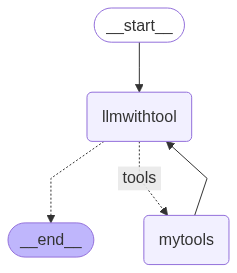

In [280]:
from IPython.display import Image, display
display(Image(app3.get_graph().draw_mermaid_png()))

In [281]:
from langgraph.checkpoint.memory import MemorySaver

In [282]:
memory=MemorySaver()

In [292]:
workflow3=StateGraph(MessagesState)
workflow3.add_edge("mytools","llmwithtool")
workflow3.add_node("llmwithtool",call_model)

workflow3.add_node("mytools",tool_node)

workflow3.add_edge(START,"llmwithtool")

workflow3.add_conditional_edges("llmwithtool",
                                router_function,
                                {"tools":"mytools",
                                 END:END})



In [293]:
app4=workflow3.compile(checkpointer=memory)

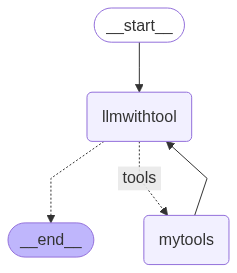

In [294]:
from IPython.display import Image, display
display(Image(app4.get_graph().draw_mermaid_png()))

In [ ]:
# Every chat is treated as a single thread. thread_id helps to store the conversation history
config={"configurable": {"thread_id": "1"}}

In [296]:
events=app4.stream(
    {"messages":["what is a weather in new delhi?"]},config=config,stream_mode="values"
    )

In [297]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

what is a weather in new delhi?
================================== Ai Message ==================================
Tool Calls:
  search (arx7jcghm)
 Call ID: arx7jcghm
  Args:
    query: New Delhi weather
================================= Tool Message =================================
Name: search

the temperature in delhi is 45 degrees celsius
================================== Ai Message ==================================

The current temperature in New Delhi is **45 degrees Celsius**.


In [306]:
events=app4.stream(
    {"messages":["what is a weather in indore?"]},config=config,stream_mode="values"
    )

In [307]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

what is a weather in indore?
================================== Ai Message ==================================
Tool Calls:
  search (esvgkkyeb)
 Call ID: esvgkkyeb
  Args:
    query: Indore weather
================================= Tool Message =================================
Name: search

the temperature is 25 degrees celsius.
================================== Ai Message ==================================

I apologize for the repetition earlier. The temperature in Indore is currently 25 degrees Celsius. If you need more detailed weather information, such as humidity, wind speed, or the forecast, please let me know and I'll be happy to assist further!


In [308]:
memory.get(config)

{'v': 3,
 'ts': '2025-06-14T18:34:48.980208+00:00',
 'id': '1f0494e4-0ac6-65e0-8032-84529aa38a38',
 'channel_versions': {'__start__': '00000000000000000000000000000049.0.8893029098590575',
  'messages': '00000000000000000000000000000052.0.37701570122701444',
  'branch:to:llmwithtool': '00000000000000000000000000000052.0.1402085101418301',
  'branch:to:mytools': '00000000000000000000000000000051.0.22095718412787502'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000048.0.5548670625793103'},
  'llmwithtool': {'branch:to:llmwithtool': '00000000000000000000000000000051.0.3706732814738699'},
  'mytools': {'branch:to:mytools': '00000000000000000000000000000050.0.02281225460239089'}},
 'channel_values': {'messages': [HumanMessage(content='what is a weather in new delhi?', additional_kwargs={}, response_metadata={}, id='a8a60ec1-da56-492a-8a2b-ce8d27b3779e'),
   AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'ck1v5sqma', 'function'

In [312]:
events=app4.stream(
    {"messages":["in which city the temp was 45 degree?"]},config=config,stream_mode="values"
    )

In [313]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

in which city the temp was 45 degree?
================================== Ai Message ==================================

The temperature in **New Delhi** was 45 degrees Celsius.


In [314]:
memory.get(config)

{'v': 3,
 'ts': '2025-06-14T18:38:08.823690+00:00',
 'id': '1f0494eb-7ca1-681e-8038-b710f6547700',
 'channel_versions': {'__start__': '00000000000000000000000000000057.0.7891564832297524',
  'messages': '00000000000000000000000000000058.0.6296754742703029',
  'branch:to:llmwithtool': '00000000000000000000000000000058.0.7828016371561314',
  'branch:to:mytools': '00000000000000000000000000000051.0.22095718412787502'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000056.0.41053251048087436'},
  'llmwithtool': {'branch:to:llmwithtool': '00000000000000000000000000000057.0.2549303557366712'},
  'mytools': {'branch:to:mytools': '00000000000000000000000000000050.0.02281225460239089'}},
 'channel_values': {'messages': [HumanMessage(content='what is a weather in new delhi?', additional_kwargs={}, response_metadata={}, id='a8a60ec1-da56-492a-8a2b-ce8d27b3779e'),
   AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'ck1v5sqma', 'function'